In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jlinops
import sampi

# Set up problem

In [2]:
# Load test image
#image = jlinops.meme()
image=  jlinops.satellite()

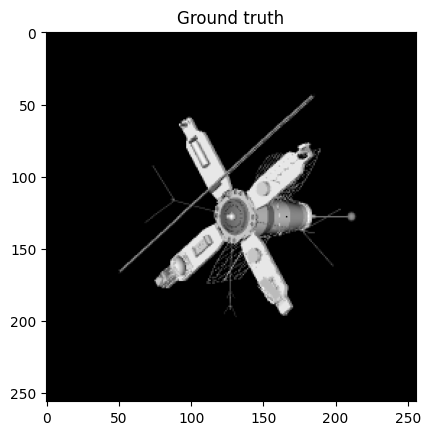

In [3]:
plt.imshow(image, cmap="gray")
plt.title("Ground truth")
plt.show()

In [44]:
# Make sub-sampling mask
np.random.seed(0)
mask = np.random.binomial(1, 0.1, size=image.shape)

# Make sub-sampling operator
subsampling_op = jlinops.Subsampling2DOperator(mask)

# Observed image
subsampled = subsampling_op.matvec(image.flatten())
noise_sigma = 0.01
noise_var = noise_sigma**2
y = subsampled + noise_sigma*np.random.normal(size=subsampled.shape)
back_proj = subsampling_op.rmatvec(y).reshape(image.shape)


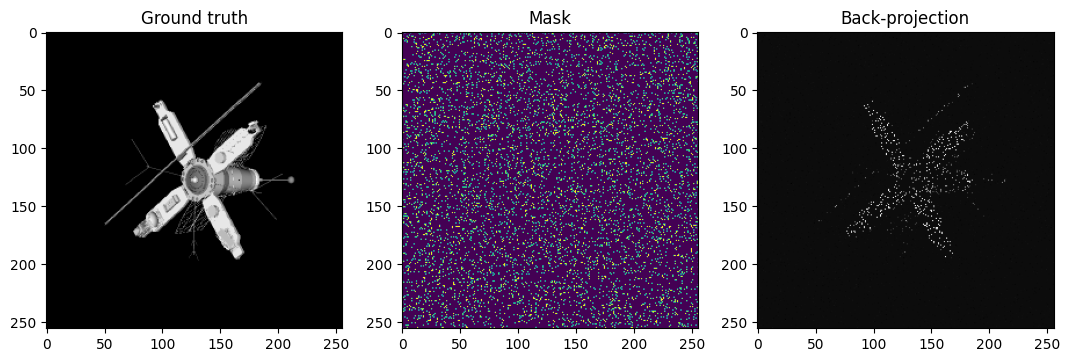

In [45]:
# Plot
fig, axs = plt.subplots(1, 3, figsize=(13,8))

axs[0].imshow(image, cmap="gray")
axs[0].set_title("Ground truth")
axs[1].imshow(mask)
axs[1].set_title("Mask")
axs[2].imshow(back_proj, cmap="gray")
axs[2].set_title("Back-projection")

plt.show()

# Build objective and do reconstruction

In [78]:
# Data likelihood term
f = sampi.GaussianDataLikelihood(subsampling_op, y, v=noise_var)

In [79]:
# Regularization term
g = sampi.TVNeumann2DPenalty(image.shape, reg_lam=1e-2)

In [80]:
obj = sampi.CompositeModelObjectiveFunction(f, g)

In [81]:
print(f"L = {f.L}")

L = 10500.000000000002


In [82]:
solver = sampi.MFISTASolver(obj)

In [88]:
solver_data = solver.solve(iterations=5000, L=100)

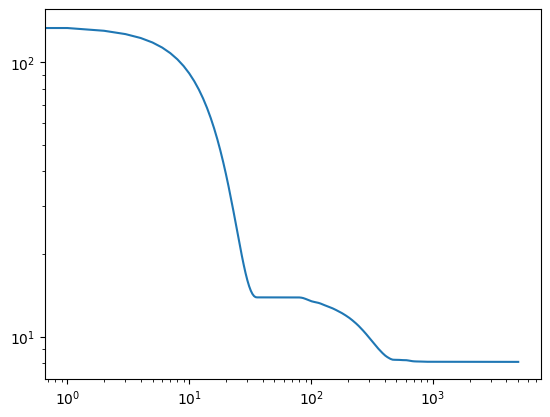

In [91]:
plt.loglog(solver_data["obj_vals"])
plt.show()

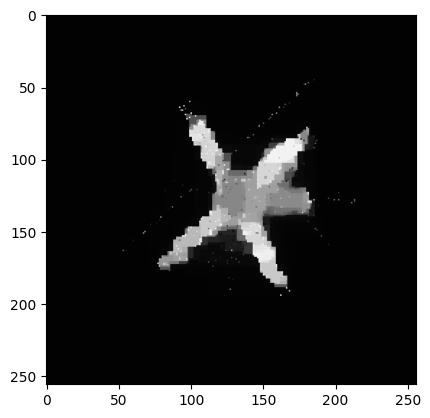

In [92]:
plt.imshow(solver_data["result"].reshape(image.shape), cmap="gray")
plt.show()

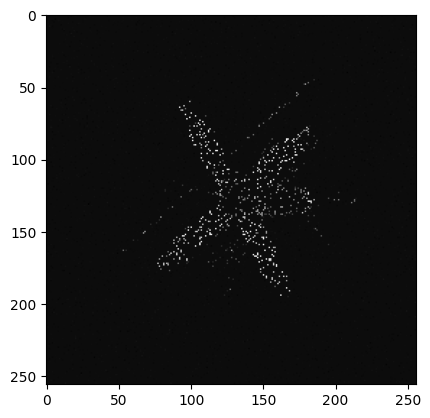

In [86]:
plt.imshow(back_proj, cmap="gray")
plt.show()